#### An HR company as hired you as a Data Scientist. Your role is to create a model that can predict the salary of the employee based on his/her years of experience


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
salaryData = pd.read_csv('Salary_Data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


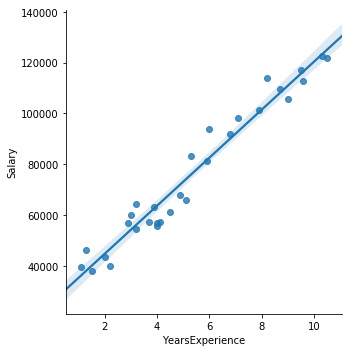

In [9]:
#Vis for Regression Best Line 
sns.lmplot(x='YearsExperience',y='Salary', data=salaryData)

In [3]:
#Check for Missing data
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [28]:
salaryData.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
#Seperate my data as features and label
#Sklearn expects your data to be in the form of Numpy Array

# Regression -- expected by SKLEARN !!!!
# Features and Label must a 2D array
features = salaryData.iloc[:,[0]].values
label = salaryData.iloc[:,[1]].values

In [22]:
#Trying to get Generalized model using BruteForcing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in range(1,31):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing: {} Training: {} RandomState: {}".format(test_score,train_score,i))
    

Testing: 0.9695039421049821 Training: 0.9545249190394052 RandomState: 3
Testing: 0.9631182154839475 Training: 0.9528197369259258 RandomState: 8
Testing: 0.9816423482070255 Training: 0.9494673013344644 RandomState: 10
Testing: 0.9606215790278543 Training: 0.9527636176933665 RandomState: 14
Testing: 0.9835849730044817 Training: 0.9460054870434312 RandomState: 26
Testing: 0.9636425773684422 Training: 0.9527636606684406 RandomState: 27
Testing: 0.9944092048209744 Training: 0.9400496694274888 RandomState: 30


In [23]:
#Create Train Test Split
# We will use Training Set to train our model
# We will use Testing Set to check the quality of our model
# Split Ratio - ?  (80-20, 70-30, 65-35 subject to your data size(data points))

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=30) #Control seed value


In [24]:
#Create the model --- LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) #Training HAppens ---> Calculation of Coeff and intercept

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#Check the quality
#Two Measures to check the quality
# 1. Check whether the model is generalized model or not
# 2. Check whether the model has sufficient accuracy score to approve the model (Statistics)

# 1. Check whether the model is generalized model or not
# training dataset score < testing dataset score --- Model is Generalized Model
# testing dataset score < training dataset score --- Model is overfitted model (Model memorized data)

print("Training Score: ",model.score(X_train,y_train))
print("Testing Score: ",model.score(X_test,y_test))

Training Score:  0.9400496694274888
Testing Score:  0.9944092048209744


In [26]:
model.coef_

array([[9481.03756369]])

In [27]:
model.intercept_

array([25566.43561641])

In [ ]:
#Salary = 25609.89799835 + (9332.94473799 * YearsExperience)

In [29]:
#Perform Prediction with unknown data
model.predict(np.array([[25]]))

array([[262592.37470859]])

In [30]:
#Perform Prediction with unknown data
exp = float(input("Enter Years of Experience: "))
expArray = np.array([[exp]])
prediction = model.predict(expArray)
print("Salary for {} years of experience is USD {}".format(exp,prediction))

Enter Years of Experience: 25
Salary for 25.0 years of experience is USD [[262592.37470859]]


In [31]:
#Deploy the model
# Pickle ---> Convert memory object into a file
import pickle
pickle.dump(model,open('SalaryPredictor.model','wb'))